In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d

## The Non-Fuzzy Approach
Let's start with the simplest possible relationship. Suppose that the tip always equals 15% of the total bill.     
```tip = 0.15```

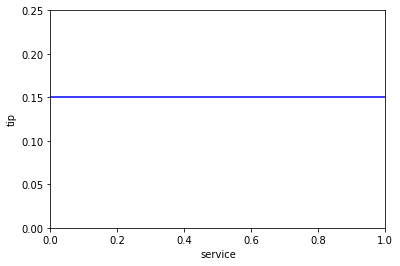

In [2]:
plt.axhline(y=0.15, color='b', linestyle='-')
plt.xlabel('service')
plt.ylabel('tip')
plt.ylim((0, 0.25))
plt.show()

This doesn't really take into account the quality of the service, so we need to add a new term to the equation. Since service is rated on a scale of 0 to 10, we might have the tip go linearly from 5% if the service is bad to 25% if the service is excellent. Now our relation looks like this.

$$tip = 0.20/10 \times service + 0.05$$

In [3]:
x = np.linspace(0, 10, 100)
y = 0.20/10*x + 0.05

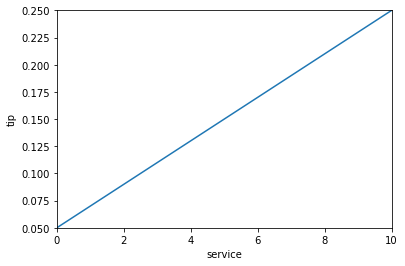

In [4]:
plt.xlabel('service')
plt.ylabel('tip')
plt.xlim((0.0, 10.0))
plt.ylim((0.05, 0.25))
plt.plot(x, y)

The formula does what we want it to do, and it's pretty straightforward. However, we may want the tip to reflect the quality of the food as well. This extension of the problem is defined as follows.

### The Extended Tipping Problem

Given two sets of numbers between 0 and 10 (where 10 is excellent) that respectively represent the quality of the service and the quality of the food at a restaurant, what should the tip be?

Let's see how the formula will be affected now that we've added another variable. Suppose we try

$$tip = 0.20/20 \times (service + food) + 0.05$$

In [5]:
def f(X, Y):
    return 0.01 * (X + Y) + 0.05

In [6]:
x = np.linspace(0, 10, 10)
y = np.linspace(0, 10, 10)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

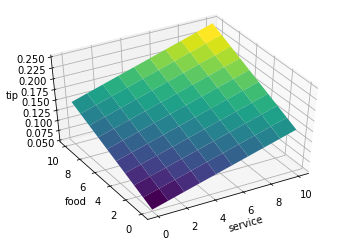

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(45, 240)
ax.set_xlabel('service')
ax.set_ylabel('food')
ax.set_zlabel('tip');

Suppose you want more of a flat response in the middle, i.e., you want to give a 15% tip in general, and will depart from this plateau only if the service is exceptionally good or bad. This, in turn, means that those nice linear mappings no longer apply. We can still salvage things by using a piecewise linear construction. Let's return to the one-dimensional problem of just considering the service. You can string together a simple conditional statement using breakpoints like this.

```
if service<3
    tip=(0.10/3)*service+0.05
elseif service<7
    tip=0.15
elseif service<=10
    tip=(0.10/3)*(service-7)+0.15
end
```

In [8]:
def f1(x):
    if x<3:
        return (0.10/3)*x+0.05
    elif x<7:
        return 0.15
    elif x<=10:
        return (0.10/3)*(x-7)+0.15

In [9]:
vfunc  = np.vectorize(f1)

In [10]:
x = np.linspace(0, 10, 100)
y = vfunc(x)

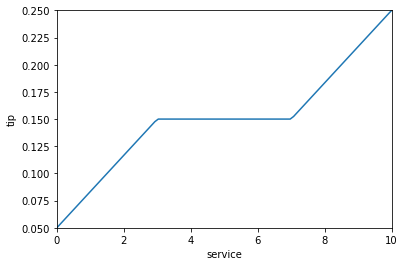

In [11]:
plt.xlabel('service')
plt.ylabel('tip')
plt.xlim((0.0, 10.0))
plt.ylim((0.05, 0.25))
plt.plot(x, y)

If we extend this to two dimensions, where we take food into account again, something like this results.

```
servRatio=0.8
if service<3:
    tip=((0.10/3)*service+0.05)*servRatio + (1-servRatio)*(0.20/10*food+0.05)
elseif service<7:
    tip=(0.15)*servRatio + (1-servRatio)*(0.20/10*food+0.05)
else:
    tip=((0.10/3)*(service-7)+0.15)*servRatio + (1-servRatio)*(0.20/10*food+0.05)
```

In [12]:
def f2(service , food):
    servRatio=0.8
    if service<3:
        return ((0.10/3)*service+0.05)*servRatio + (1-servRatio)*(0.20/10*food+0.05)
    elif service<7:
        return (0.15)*servRatio + (1-servRatio)*(0.20/10*food+0.05)
    else:
        return ((0.10/3)*(service-7)+0.15)*servRatio + (1-servRatio)*(0.20/10*food+0.05)

In [13]:
vfunc  = np.vectorize(f2)

In [14]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

X, Y = np.meshgrid(x, y)
Z = vfunc(X, Y)

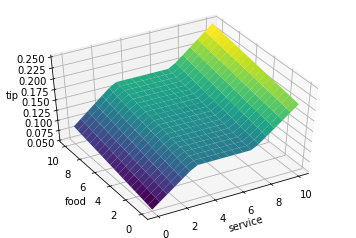

In [15]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.view_init(45, 240)
ax.set_xlabel('service')
ax.set_ylabel('food')
ax.set_zlabel('tip');

Wow! The plot looks good, but the function is surprisingly complicated. It was a little tricky to code this correctly, and it's definitely not easy to modify this code in the future. Moreover, it's even less apparent how the algorithm works to someone who didn't witness the original design process.

Ref: http://radio.feld.cvut.cz/matlab/toolbox/fuzzy/fuzzyin6.html